### Задача
Крупная компания по доставке пиццы тестирует фичу в приложении
- вечером курьеры заканчивают смену
- во время пересменки эффективность доставки значительно проседает
- новая фича - алгоритм построения маршрута до дома курьера через точки доставки

Работает ли фича?

### Данные

In [ ]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import pingouin as pg
import seaborn as sns

In [ ]:
df = pd.read_csv('pizza_delivery.csv')
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [ ]:
df.shape

(20196, 4)

- order_id - id заказа
- delivery_time - время доставки в минутах
- district - район доставки
- experiment_group - экспериментальная группа

### Решение

Имеющиеся группы

In [ ]:
df.experiment_group.unique()

array(['control', 'test'], dtype=object)

Имеющиеся районы

In [ ]:
df.district.unique()

array(['Purlieus', 'Central', 'Suburb'], dtype=object)

#### Проверка гипотезы
- H0: Разницы между средним временем доставки в тестовой и контрольной группе нет
- H1: Разница между средним временем доставки в тестовой и контрольной группе есть

Для проверки будет использоваться t-test

Требования для использования t-теста:
- отсутствие выбросов
- гомогенность дисперсий
- независимость наблюдений
- желательно нормальность распределений

In [ ]:
control_df = df[df.experiment_group == 'control']
test_df = df[df.experiment_group == 'test']

_Размеры выборок_

In [ ]:
df.value_counts('experiment_group')

experiment_group
test       10104
control    10092
dtype: int64

=> размеры выборок сходны

_Нормальность распрделений_

In [ ]:
control_df.groupby('district').delivery_time.count()

district
Central      669
Purlieus    8781
Suburb       642
Name: delivery_time, dtype: int64

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

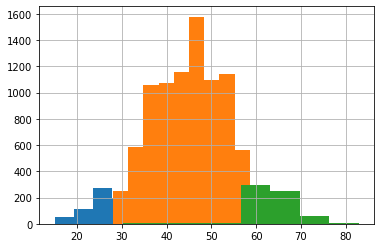

In [ ]:
control_df.groupby('district').delivery_time.hist()

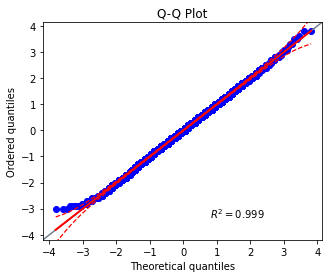

In [ ]:
pg.qqplot(control_df.delivery_time);

In [ ]:
ss.normaltest(control_df.delivery_time)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [ ]:
test_df.groupby('district').delivery_time.count()

district
Central     1727
Purlieus    8179
Suburb       198
Name: delivery_time, dtype: int64

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

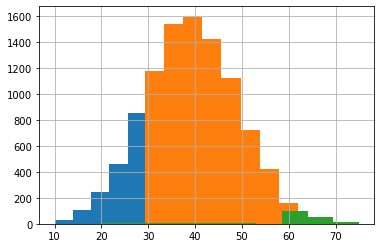

In [ ]:
test_df.groupby('district').delivery_time.hist()

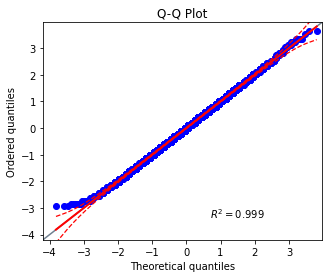

In [ ]:
pg.qqplot(test_df.delivery_time);

In [ ]:
ss.normaltest(test_df.delivery_time)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

_Гомогенность дисперсий_

In [ ]:
ss.levene(control_df.delivery_time, test_df.delivery_time)

LeveneResult(statistic=0.2702281101900882, pvalue=0.6031844931083392)

=> можно считать дисперсиии гомогенными

_Независимость наблюдений_ полагаем в силу дизайна эксперимента

_Проверка гипотезы_

In [ ]:
st.ttest_ind(control_df.delivery_time, test_df.delivery_time)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

p-value < 0.05 => гипотеза об изменении времени доставки справедлива

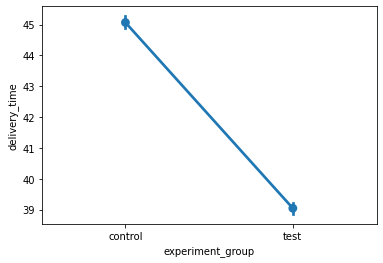

In [ ]:
sns.pointplot(data=df, x='experiment_group', y='delivery_time');

**Вывод:** Фичу можно раскатывать, с ней время доставки статзначимо снизилось

Изменение среднего времени доставки в %

In [ ]:
round(
    (test_df.delivery_time.mean() - control_df.delivery_time.mean())
    / control_df.delivery_time.mean()
    * 100
    , 2
)

-13.35

Inspired by: KCM7L4P